# <b><u>AI-Driven Code Plagarism and Similarity Detection</u></b>


### **Business Objectives**

1. **Plagiarism Detection**: Identify plagiarism in code to ensure originality in academic, professional, and open-source projects.
2. **Similarity Analysis**: Compute similarity scores between code files to detect reused or near-duplicate code.
3. **Real-Time Comparison**: Enable real-time comparison of code files for plagiarism or similarity detection.
4. **Educational Use**: Help educators detect plagiarism in student code submissions.
5. **Code Quality and Compliance**: Ensure adherence to coding standards and detect unauthorized code reuse.
6. **Automation**: Reduce manual effort in plagiarism detection by automating code comparison.
7. **Scalability**: Handle large volumes of code submissions in a scalable manner.
8. **Improved Accuracy**: Use AI to improve detection accuracy, identifying subtle code similarities.

### **Constraints**

1. **Data Privacy**: Ensure secure handling of user-submitted code to protect sensitive information.
2. **Performance**: Optimize the system to handle large-scale code comparisons efficiently.
3. **Accuracy**: Address false positives/negatives in detecting plagiarism or similarities.
4. **Domain Specificity**: Adapt to different programming languages and domains.
5. **Code Obfuscation**: Detect and handle intentionally obfuscated code.
6. **Limited Datasets**: Lack of large annotated datasets for training models.
7. **User Interface**: Create a simple and intuitive user interface for easy code submission and result display.


### **Expected Outputs**

- Similarity score between reference and uploaded code.
- Highlight matched code sections visually (e.g., red color).
- Display detailed analysis and scores for comparison.

### **User Flow**

1. Upload reference code.
2. Upload multiple code files to compare.
3. View similarity scores and visual highlights of matching code.

### Importing Necessary Libraries

In [14]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

### Read csv file and display 1st five records using head

In [15]:
df=pd.read_csv("python_code_train.csv")
df.head()

,problem_id,original_src,changed_src,error,stderr
0,p00001,num = [int(input()) for i in range(10)]\nnum.s...,num = [int(input()) for i in range(10)]\nnum.s...,TypeError: 'type' object is not subscriptable,"Traceback (most recent call last):\n File ""/h..."
1,p00003,import sys\n\ninput()\nfor e in sys.stdin:\n ...,import sys\n\ninput()\nfor e in sys.stdin:\n ...,"TypeError: int() argument must be a string, a ...","Traceback (most recent call last):\n File ""/h..."
2,p00003,while True:\n try:\n input_line = in...,"n = int(input())\nfor i in range(0, n):\n n...",IndexError: list index out of range,"Traceback (most recent call last):\n File ""/h..."
3,p00006,print(input[::-1])\n,print(input()[::-1])\n,TypeError: 'builtin_function_or_method' object...,"Traceback (most recent call last):\n File ""/h..."
4,p00007,import math\n\nr = 100\nn = input()\nfor i in ...,import math\n\nr = 100\nn = int(input())\nfor ...,TypeError: 'str' object cannot be interpreted ...,"Traceback (most recent call last):\n File ""/h..."


- **problem_id** : unique problem id for each problem
- **original_src** : contains original source code as it is before any changes made
- **changed_src** : it shows changes made to original source code
- **error** : type of error occured during the changed code
- **stderr** : capture the error messege from the standard error stream

### By using shape display the rows and columns of dataset

In [16]:
df.shape

(1974, 5)

### Info displays the concise summary of DataFrame

In [17]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   problem_id    1974 non-null   object
 1   original_src  1974 non-null   object
 2   changed_src   1974 non-null   object
 3   error         1974 non-null   object
 4   stderr        606 non-null    object
dtypes: object(5)
memory usage: 77.2+ KB


data.info() method provides a concise summary of the DataFrame, including the number of entries, column names, non-null counts, data types, and memory usage.

### Check for missing values

In [18]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 problem_id         0
original_src       0
changed_src        0
error              0
stderr          1368
dtype: int64


#### *stderr shows 1368 null values which means that there was no error output generated when the changed code was executed.*

In [19]:
df['stderr'] = df['stderr'].fillna('No Error Output')
df.isnull().sum()

problem_id      0
original_src    0
changed_src     0
error           0
stderr          0
dtype: int64

#### *we filled with placeholder value . Using a placeholder (like "No Error Output") provides context that helps distinguish between valid data and missing data.*

In [20]:
df.head()

,problem_id,original_src,changed_src,error,stderr
0,p00001,num = [int(input()) for i in range(10)]\nnum.s...,num = [int(input()) for i in range(10)]\nnum.s...,TypeError: 'type' object is not subscriptable,"Traceback (most recent call last):\n File ""/h..."
1,p00003,import sys\n\ninput()\nfor e in sys.stdin:\n ...,import sys\n\ninput()\nfor e in sys.stdin:\n ...,"TypeError: int() argument must be a string, a ...","Traceback (most recent call last):\n File ""/h..."
2,p00003,while True:\n try:\n input_line = in...,"n = int(input())\nfor i in range(0, n):\n n...",IndexError: list index out of range,"Traceback (most recent call last):\n File ""/h..."
3,p00006,print(input[::-1])\n,print(input()[::-1])\n,TypeError: 'builtin_function_or_method' object...,"Traceback (most recent call last):\n File ""/h..."
4,p00007,import math\n\nr = 100\nn = input()\nfor i in ...,import math\n\nr = 100\nn = int(input())\nfor ...,TypeError: 'str' object cannot be interpreted ...,"Traceback (most recent call last):\n File ""/h..."


**<u>Error frequency analysis</u> involves examining the frequency at which different types of errors occur in a system, dataset, or process. It helps identify patterns, trends, and the most prevalent error types.**

C:\Users\HP\AppData\Local\Temp\ipykernel_4840\1807911608.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


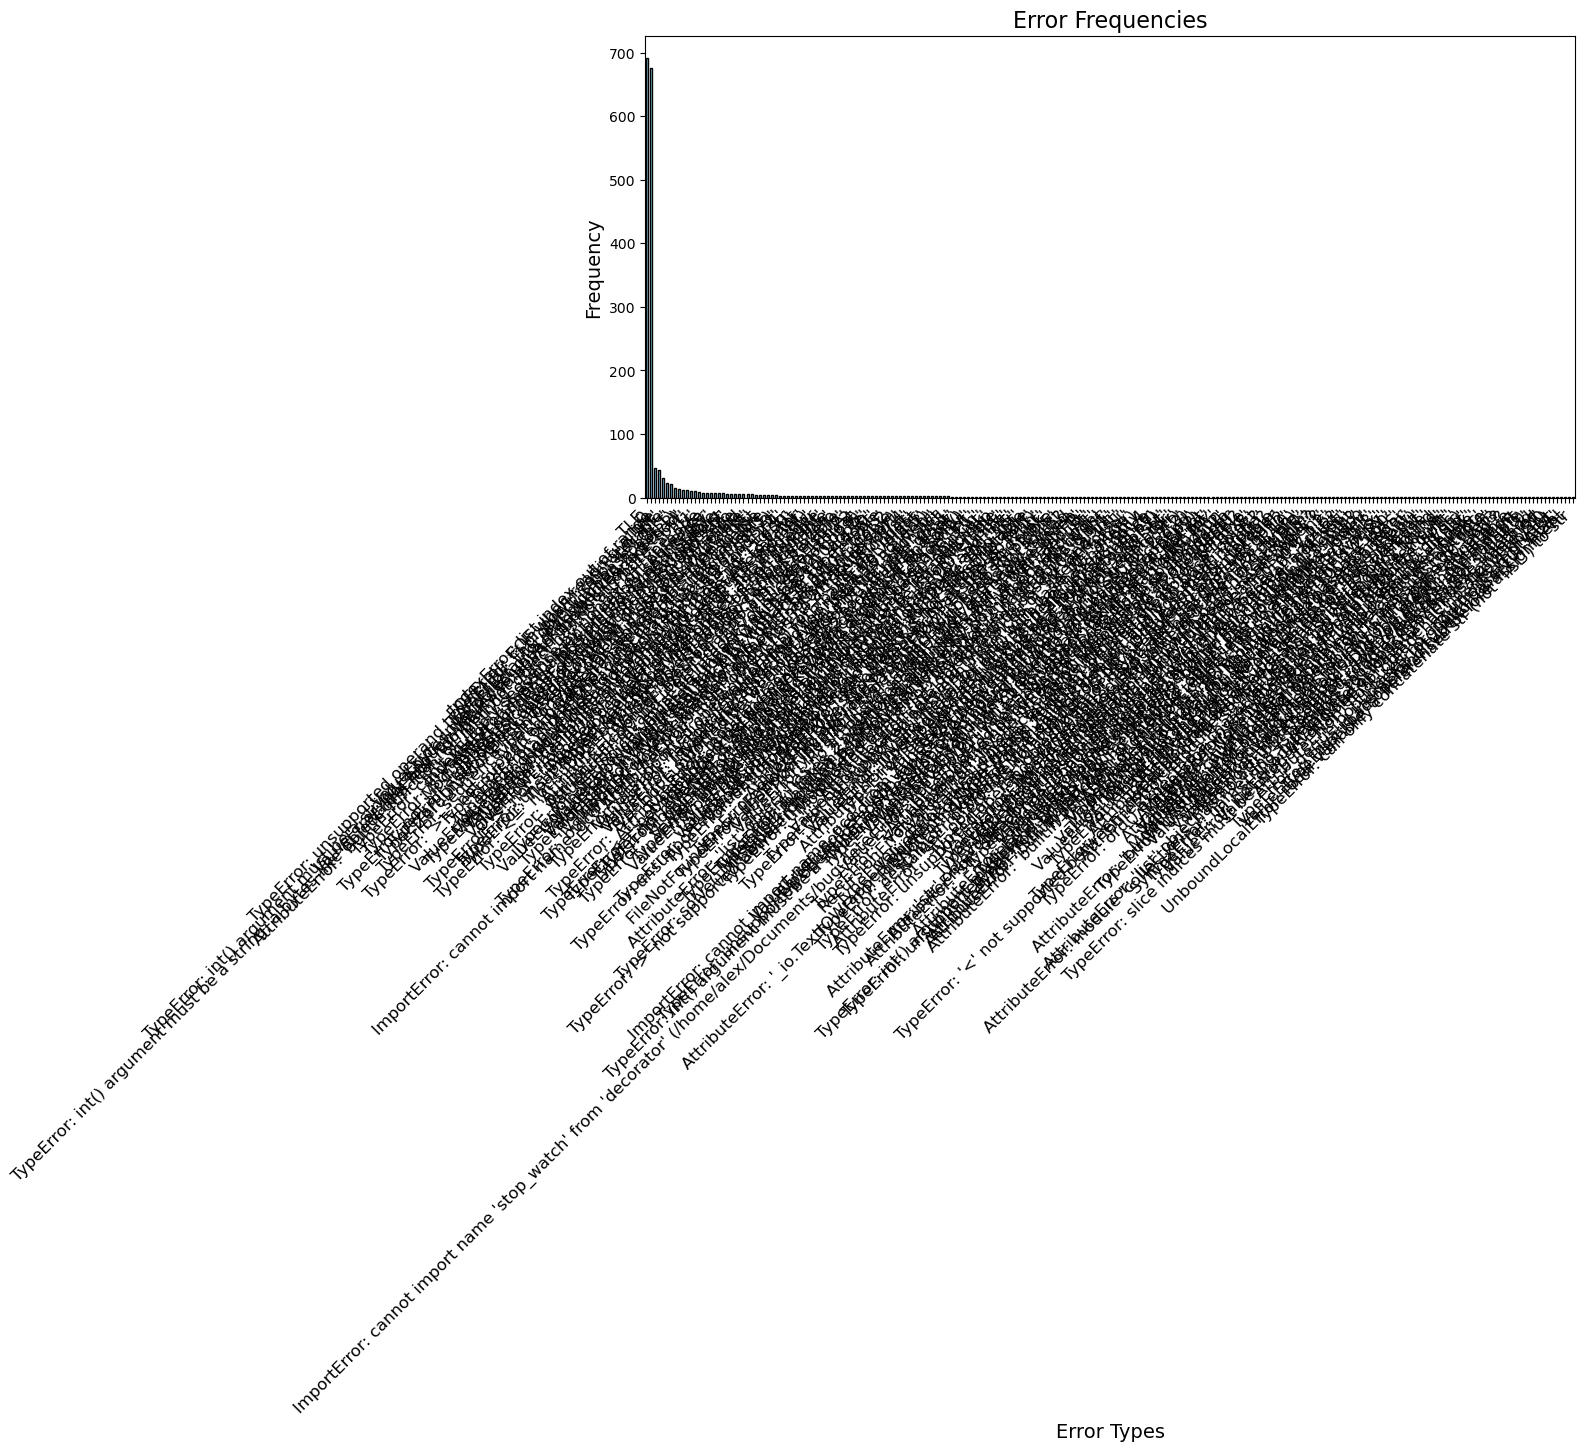

In [21]:
# Error frequency analysis
error_counts = df['error'].value_counts()
plt.figure(figsize=(12, 6))
error_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Error Frequencies', fontsize=16)
plt.xlabel('Error Types', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.savefig('error_frequencies.png')
plt.show()

The bar chart above illustrates the frequency of different error types in the dataset. The most frequent error types are displayed with taller bars, highlighting the recurring issues in the dataset.

### **Key Observations from the Chart:**
**Frequent Errors**: Errors with the highest bars are the most common and may need immediate attention.<br>
**Rare Errors**: Errors with shorter bars are less frequent but could still hold valuable insights.

### **Error percentage distribution (Pie Chart)**

#### **Why Pie Chart for Error Distribution?**
Shows Proportions: Highlights each error type's share of total errors.<br>
Quick Insights: Easily identifies dominant and rare errors.<br>
Prioritization: Helps focus on frequent errors for efficient debugging.<br>
Complementary View: Adds a percentage-based perspective to the bar chart's absolute values

C:\Users\HP\AppData\Local\Temp\ipykernel_4840\1977665012.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


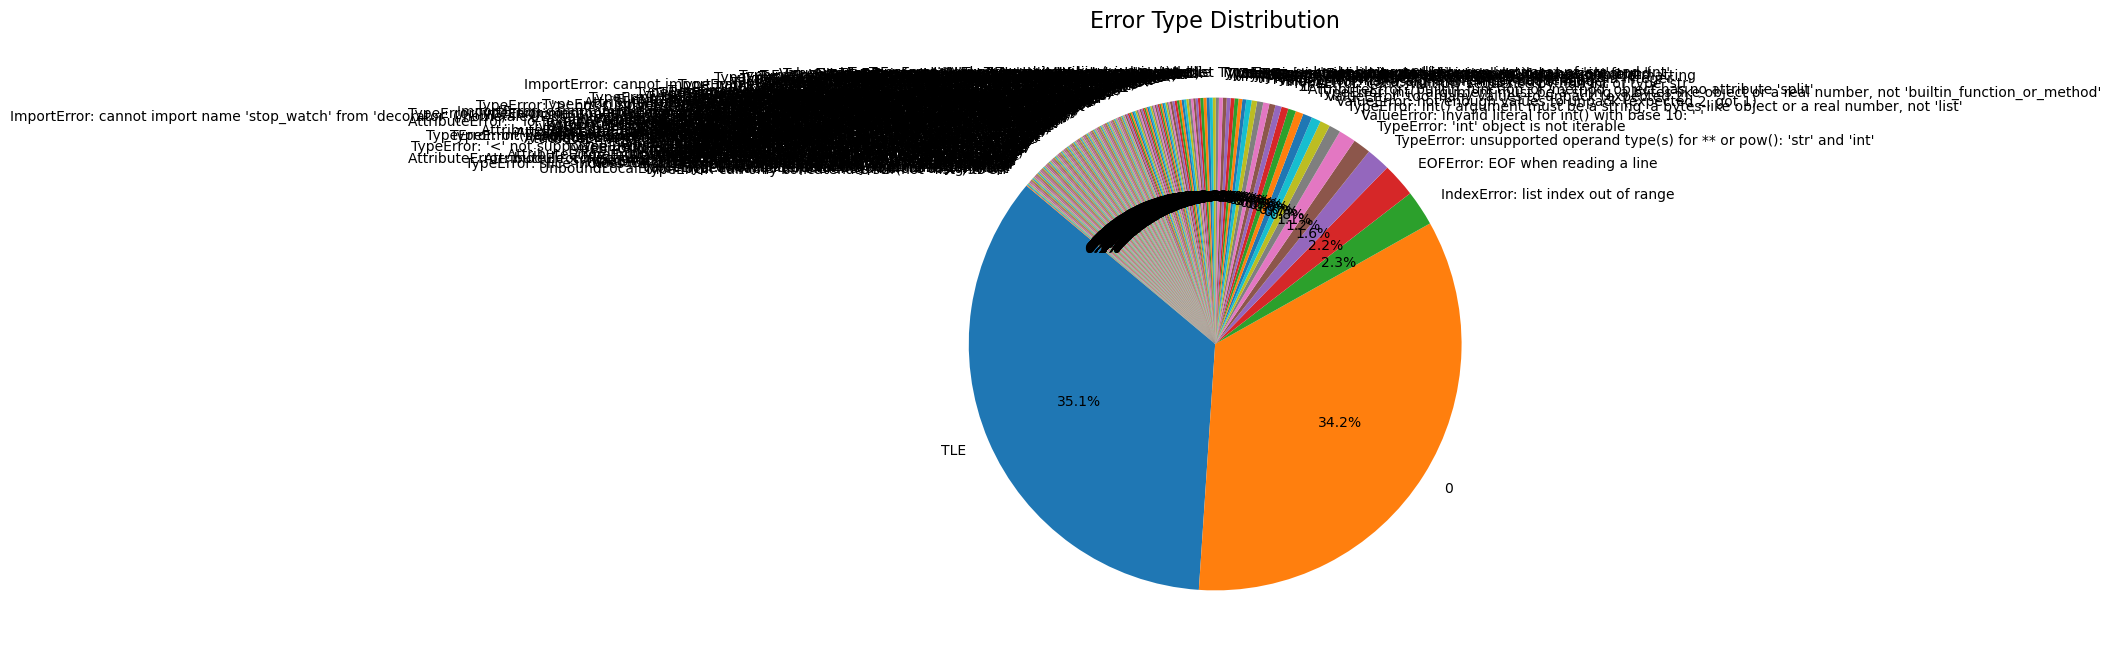

In [22]:
# Additional Visualizations
# Error percentage distribution (Pie Chart)
plt.figure(figsize=(8, 8))
error_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Error Type Distribution', fontsize=16)
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.savefig('error_distribution_pie.png')
plt.show()


#### **Output Explanation** 
Each slice represents an error type.<br>
Size of slices shows the proportion of each error.<br>
Percentages on slices quantify their contribution to the total.

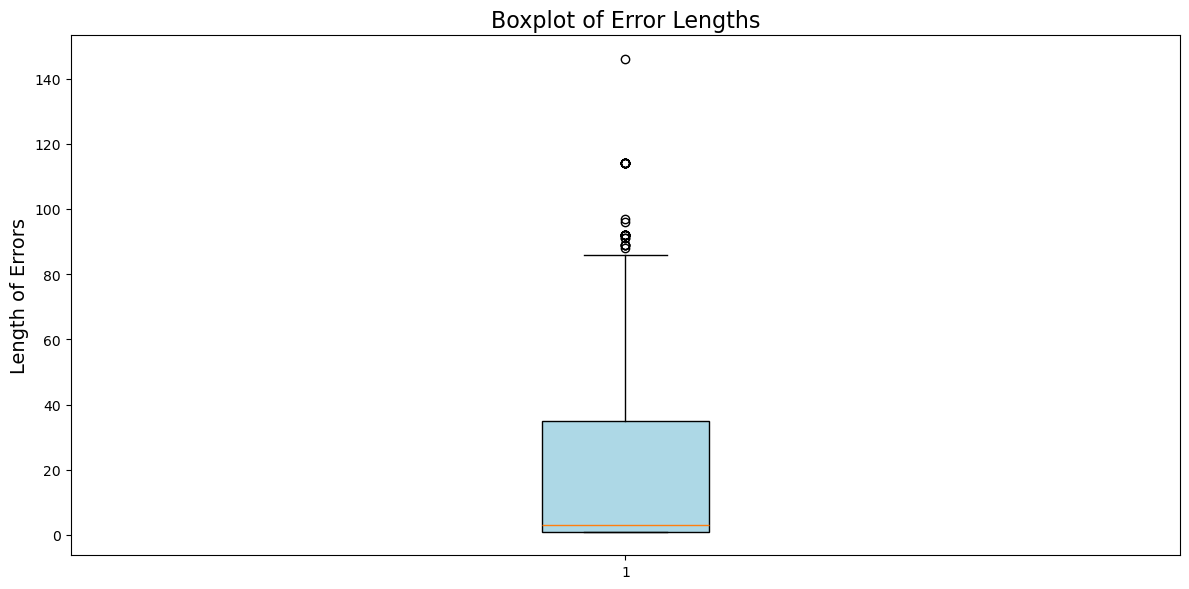

In [23]:
# Boxplot of error lengths (if applicable)
df['error_length'] = df['error'].str.len()
plt.figure(figsize=(12, 6))
plt.boxplot(df['error_length'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Boxplot of Error Lengths', fontsize=16)
plt.ylabel('Length of Errors', fontsize=14)
plt.tight_layout()
plt.savefig('error_length_boxplot.png')
plt.show()

### **Outlier Detection Output explanation**

The boxplot shows how long the error messages are, with most lengths grouped inside the box and whiskers. Dots outside the whiskers are very short or very long errors that are uncommon.

#### Below code is performing feature extraction, dimensionality reduction, and visualization on text data.

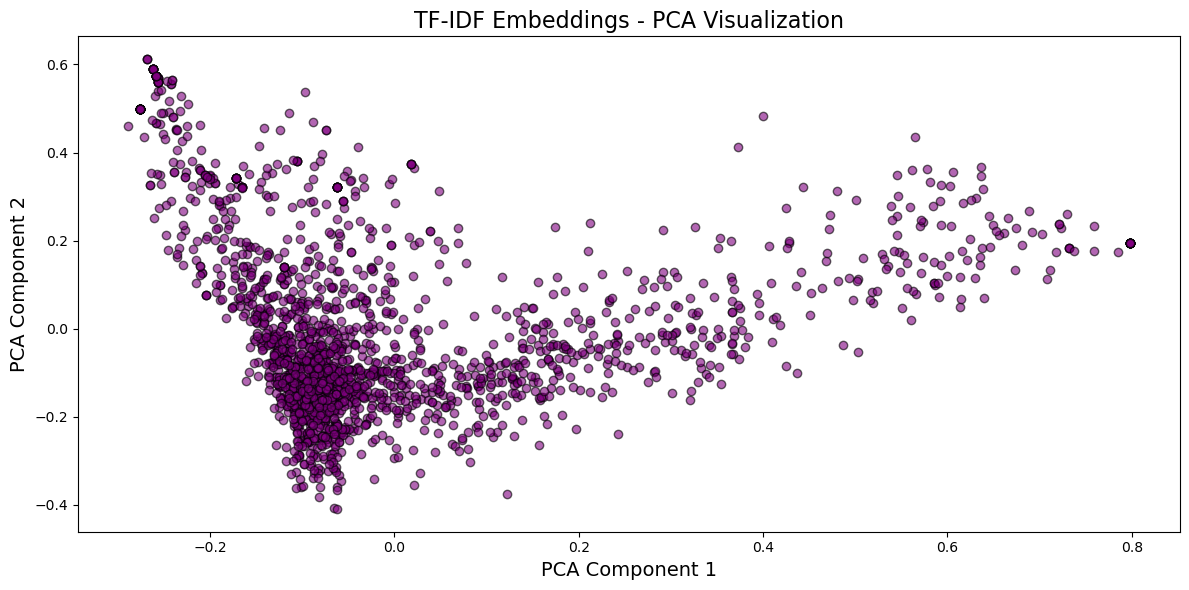

EDA, Text Cleaning, Tokenization, and TF-IDF Embedding complete.


In [26]:
#  TF-IDF Embeddings
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)

# Fit and transform the cleaned text data
tfidf_original = tfidf_vectorizer.fit_transform(df['cleaned_original_src'])
tfidf_changed = tfidf_vectorizer.fit_transform(df['cleaned_changed_src'])

# Convert to dense arrays for analysis
tfidf_original_dense = tfidf_original.toarray()
tfidf_changed_dense = tfidf_changed.toarray()

# Save TF-IDF arrays
import numpy as np
np.save('tfidf_original.npy', tfidf_original_dense)
np.save('tfidf_changed.npy', tfidf_changed_dense)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_original_dense)

# Visualize PCA results
plt.figure(figsize=(12, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, color='purple', edgecolor='black')
plt.title('TF-IDF Embeddings - PCA Visualization', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.tight_layout()
plt.savefig('tfidf_pca_visualization.png')
plt.show()

print("EDA, Text Cleaning, Tokenization, and TF-IDF Embedding complete.")


### **Output Explanation :**
Each point represents a document (or row) in the dataset.<br>
The graph highlights similarities or differences between documents:<br>
Clusters: Points grouped together indicate documents with similar word importance or patterns.<br>
Spread: A wider spread suggests high variability among the documents.
This helps visualize relationships or outliers in the text data.

## Token-Based Similarity
#### Objective: Compute similarity based on token overlap.
#### Method: Use Jaccard similarity to compare sets of tokens extracted from original_src and changed_src.
#### Actions:
- Tokenize each source code snippet.
- Apply Jaccard similarity to measure the overlap between tokens of original_src and changed_src.

Formula:
Jaccard Similarity
=∣𝐴∩𝐵∣∣𝐴∪𝐵∣
Jaccard Similarity= ∣A∪B∣ / ∣A∩B∣
​
 
Where:∣𝐴∩𝐵∣
∣A∩B∣ is the number of elements common to both sets 𝐴 and 𝐵(intersection).
∣A∪𝐵∣ is the number of elements present in either set 𝐴, 𝐵 or both (union).

In [16]:
import re

# Tokenize code by removing special characters
def preprocess_code(code):
    return re.sub(r'[^a-zA-Z0-9\s]', '', code).split()

# Calculate Jaccard similarity between two sets of tokens
def jaccard_similarity(tokens1, tokens2):
    set1, set2 = set(tokens1), set(tokens2)
    return len(set1.intersection(set2)) / len(set1.union(set2)) if set1.union(set2) else 0

# Calculate token similarity
df['token_similarity'] = df.apply(lambda row: jaccard_similarity(preprocess_code(row['original_src']),
                                                                 preprocess_code(row['changed_src'])), axis=1)
print(df[['original_src', 'changed_src', 'token_similarity']].head())



                                        original_src  \
0  num = [int(input()) for i in range(10)]\nnum.s...   
1  import sys\n\ninput()\nfor e in sys.stdin:\n  ...   
2  while True:\n    try:\n        input_line = in...   
3                               print(input[::-1])\n   
4  import math\n\nr = 100\nn = input()\nfor i in ...   

                                         changed_src  token_similarity  
0  num = [int(input()) for i in range(10)]\nnum.s...          0.800000  
1  import sys\n\ninput()\nfor e in sys.stdin:\n  ...          0.850000  
2  n = int(input())\nfor i in range(0, n):\n    n...          0.448276  
3                             print(input()[::-1])\n          1.000000  
4  import math\n\nr = 100\nn = int(input())\nfor ...          0.866667  


In [18]:
# Define a similarity threshold
similarity_threshold = 0.85

# Filter the DataFrame based on the similarity threshold
most_similar_df = df[df['token_similarity'] >= similarity_threshold]

# Display the most similar original and changed code pairs with their similarity score
print(most_similar_df[['original_src', 'changed_src', 'token_similarity']])

# Count the number of most similar pairs
similar_count1 = most_similar_df.shape[0]
print(f"\nNumber of code pairs with token similarity >= {similarity_threshold}: {similar_count1}")


                                           original_src  \
1     import sys\n\ninput()\nfor e in sys.stdin:\n  ...   
3                                  print(input[::-1])\n   
4     import math\n\nr = 100\nn = input()\nfor i in ...   
11    while True:\n    a = list(map(str, input().spl...   
17    def binarySearch(array, key):\n    left = 0\n ...   
...                                                 ...   
1968  H, W = map(int, input().split())\nG = [list(ma...   
1969  h, w = map(int, input().split())\na = []\n\nfo...   
1970  import sys\n\nsys.setrecursionlimit(10**6)\nIN...   
1972  import sys\n\n\ndef input():\n    return sys.s...   
1973  from functools import partial\nfrom itertools ...   

                                            changed_src  token_similarity  
1     import sys\n\ninput()\nfor e in sys.stdin:\n  ...          0.850000  
3                                print(input()[::-1])\n          1.000000  
4     import math\n\nr = 100\nn = int(input())\nfor ...        

### Number of code pairs with token similarity >= 0.85: 1147

#### **add token similarity for each row in a separate column**

In [22]:
def calculate_token_similarity(row):
    original_tokens = set(row['original_src'].split())
    changed_tokens = set(row['changed_src'].split())
    return len(original_tokens.intersection(changed_tokens)) / max(len(original_tokens), len(changed_tokens), 1)

df['token_similarity'] = df.apply(calculate_token_similarity, axis=1)
df.columns

Index(['problem_id', 'original_src', 'changed_src', 'error', 'stderr',
       'token_similarity'],
      dtype='object')

In [24]:
df.head()

,problem_id,original_src,changed_src,error,stderr,token_similarity
0,p00001,num = [int(input()) for i in range(10)]\nnum.s...,num = [int(input()) for i in range(10)]\nnum.s...,TypeError: 'type' object is not subscriptable,"Traceback (most recent call last):\n File ""/h...",0.900000
1,p00003,import sys\n\ninput()\nfor e in sys.stdin:\n ...,import sys\n\ninput()\nfor e in sys.stdin:\n ...,"TypeError: int() argument must be a string, a ...","Traceback (most recent call last):\n File ""/h...",0.909091
2,p00003,while True:\n try:\n input_line = in...,"n = int(input())\nfor i in range(0, n):\n n...",IndexError: list index out of range,"Traceback (most recent call last):\n File ""/h...",0.642857
3,p00006,print(input[::-1])\n,print(input()[::-1])\n,TypeError: 'builtin_function_or_method' object...,"Traceback (most recent call last):\n File ""/h...",0.000000
4,p00007,import math\n\nr = 100\nn = input()\nfor i in ...,import math\n\nr = 100\nn = int(input())\nfor ...,TypeError: 'str' object cannot be interpreted ...,"Traceback (most recent call last):\n File ""/h...",0.937500


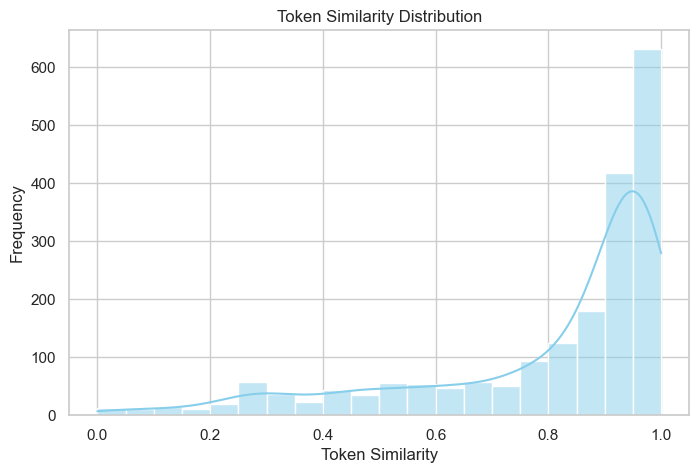

In [26]:
sns.set(style="whitegrid")

# 1. Plot for Token Similarity
plt.figure(figsize=(8, 5))
sns.histplot(df['token_similarity'], kde=True, bins=20, color='skyblue')
plt.title('Token Similarity Distribution')
plt.xlabel('Token Similarity')
plt.ylabel('Frequency')
plt.show()

- **X-axis (Token Similarity)**: The score can range from 0 (no similarity) to 1 (identical token sets).
- **Y-axis (Frequency)**: This indicates how many pairs of original and changed source code correspond to each similarity score.

## Syntax Tree Similarity Calculation

In [30]:
import pandas as pd
import ast
from difflib import SequenceMatcher

# Function to compute syntax tree similarity using AST
def syntax_tree_similarity(code1, code2):
    try:
        # Parse each code snippet into an AST
        tree1 = ast.parse(code1)
        tree2 = ast.parse(code2)
        # Convert ASTs to strings and compute similarity
        tree1_str = ast.dump(tree1)
        tree2_str = ast.dump(tree2)
        return SequenceMatcher(None, tree1_str, tree2_str).ratio()
    except SyntaxError as e:
        print(f"Syntax error in code: {e}")
        return 0  # Return 0 similarity if parsing fails

# Apply syntax similarity to each row
df['syntax_similarity'] = df.apply(lambda row: syntax_tree_similarity(row['original_src'], row['changed_src']), axis=1)

# Define syntax similarity threshold
syntax_threshold = 0.85

# Filter for most syntactically similar code pairs
most_syntax_similar_df = df[df['syntax_similarity'] >= syntax_threshold]

# Display the filtered results and count
print(most_syntax_similar_df[['original_src', 'changed_src', 'syntax_similarity']])
similar_count2 = most_syntax_similar_df.shape[0]
print(f"\nNumber of code pairs with syntax similarity >= {syntax_threshold}: {similar_count2}")


                                           original_src  \
1     import sys\n\ninput()\nfor e in sys.stdin:\n  ...   
3                                  print(input[::-1])\n   
4     import math\n\nr = 100\nn = input()\nfor i in ...   
5     print(*sorted(map(int, input().spilt()))[::-1])\n   
6     while True:\n    g = int(input())\n    now = 5...   
...                                                 ...   
1968  H, W = map(int, input().split())\nG = [list(ma...   
1969  h, w = map(int, input().split())\na = []\n\nfo...   
1970  import sys\n\nsys.setrecursionlimit(10**6)\nIN...   
1972  import sys\n\n\ndef input():\n    return sys.s...   
1973  from functools import partial\nfrom itertools ...   

                                            changed_src  syntax_similarity  
1     import sys\n\ninput()\nfor e in sys.stdin:\n  ...           0.965939  
3                                print(input()[::-1])\n           0.932238  
4     import math\n\nr = 100\nn = int(input())\nfor ...     

### Number of code pairs with syntax similarity >= 0.85: 1121

In [32]:
df.columns

Index(['problem_id', 'original_src', 'changed_src', 'error', 'stderr',
       'token_similarity', 'syntax_similarity'],
      dtype='object')

In [34]:
df.head()

,problem_id,original_src,changed_src,error,stderr,token_similarity,syntax_similarity
0,p00001,num = [int(input()) for i in range(10)]\nnum.s...,num = [int(input()) for i in range(10)]\nnum.s...,TypeError: 'type' object is not subscriptable,"Traceback (most recent call last):\n File ""/h...",0.900000,0.704675
1,p00003,import sys\n\ninput()\nfor e in sys.stdin:\n ...,import sys\n\ninput()\nfor e in sys.stdin:\n ...,"TypeError: int() argument must be a string, a ...","Traceback (most recent call last):\n File ""/h...",0.909091,0.965939
2,p00003,while True:\n try:\n input_line = in...,"n = int(input())\nfor i in range(0, n):\n n...",IndexError: list index out of range,"Traceback (most recent call last):\n File ""/h...",0.642857,0.690865
3,p00006,print(input[::-1])\n,print(input()[::-1])\n,TypeError: 'builtin_function_or_method' object...,"Traceback (most recent call last):\n File ""/h...",0.000000,0.932238
4,p00007,import math\n\nr = 100\nn = input()\nfor i in ...,import math\n\nr = 100\nn = int(input())\nfor ...,TypeError: 'str' object cannot be interpreted ...,"Traceback (most recent call last):\n File ""/h...",0.937500,0.963603


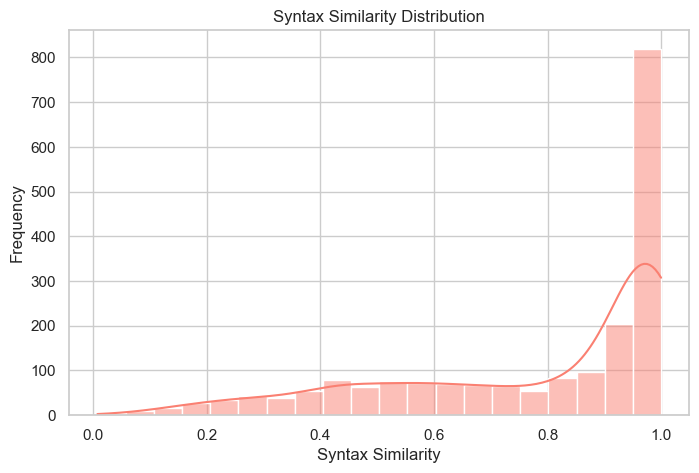

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['syntax_similarity'], kde=True, bins=20, color='salmon')
plt.title('Syntax Similarity Distribution')
plt.xlabel('Syntax Similarity')
plt.ylabel('Frequency')
plt.show()

### semantic similarity calculation

In [39]:
import os
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = '1'


In [41]:
from tqdm import tqdm
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Initialize model for semantic similarity
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to compute semantic similarity
def semantic_similarity(code1, code2):
    try:
        # Encode both code snippets
        embeddings1 = model.encode(code1, convert_to_tensor=True)
        embeddings2 = model.encode(code2, convert_to_tensor=True)
        
        # Compute cosine similarity between embeddings
        similarity_score = util.pytorch_cos_sim(embeddings1, embeddings2)
        return similarity_score.item()
    except Exception as e:
        print(f"Error computing similarity for given code pair: {e}")
        return None  # Return None if there's an error

# Apply semantic similarity function to each row with tqdm progress bar
similarities = []
for _, row in tqdm(df.iterrows(), total=len(df), desc="Computing Similarities"):
    similarity = semantic_similarity(row['original_src'], row['changed_src'])
    similarities.append(similarity)

# Add the similarity scores to the DataFrame
df['semantic_similarity'] = similarities

# Define semantic similarity threshold
semantic_threshold = 0.85

# Filter for the most semantically similar code pairs, excluding any None values
most_semantic_similar_df = df[df['semantic_similarity'] >= semantic_threshold]

# Display the filtered results and count
print(most_semantic_similar_df[['original_src', 'changed_src', 'semantic_similarity']])
similar_count = most_semantic_similar_df.shape[0]
print(f"\nNumber of code pairs with semantic similarity >= {semantic_threshold}: {similar_count}")


Computing Similarities: 100%|██████████████████████████████████████████████████████| 1974/1974 [06:33<00:00,  5.02it/s]

                                           original_src  \
0     num = [int(input()) for i in range(10)]\nnum.s...   
1     import sys\n\ninput()\nfor e in sys.stdin:\n  ...   
2     while True:\n    try:\n        input_line = in...   
3                                  print(input[::-1])\n   
4     import math\n\nr = 100\nn = input()\nfor i in ...   
...                                                 ...   
1968  H, W = map(int, input().split())\nG = [list(ma...   
1969  h, w = map(int, input().split())\na = []\n\nfo...   
1970  import sys\n\nsys.setrecursionlimit(10**6)\nIN...   
1972  import sys\n\n\ndef input():\n    return sys.s...   
1973  from functools import partial\nfrom itertools ...   

                                            changed_src  semantic_similarity  
0     num = [int(input()) for i in range(10)]\nnum.s...             0.992710  
1     import sys\n\ninput()\nfor e in sys.stdin:\n  ...             0.990492  
2     n = int(input())\nfor i in range(0, n):\n    n..

### Number of code pairs with semantic similarity >= 0.85: 1677

In [45]:
df.columns

Index(['problem_id', 'original_src', 'changed_src', 'error', 'stderr',
       'token_similarity', 'syntax_similarity', 'semantic_similarity'],
      dtype='object')

In [47]:
df.head()

,problem_id,original_src,changed_src,error,stderr,token_similarity,syntax_similarity,semantic_similarity
0,p00001,num = [int(input()) for i in range(10)]\nnum.s...,num = [int(input()) for i in range(10)]\nnum.s...,TypeError: 'type' object is not subscriptable,"Traceback (most recent call last):\n File ""/h...",0.900000,0.704675,0.992710
1,p00003,import sys\n\ninput()\nfor e in sys.stdin:\n ...,import sys\n\ninput()\nfor e in sys.stdin:\n ...,"TypeError: int() argument must be a string, a ...","Traceback (most recent call last):\n File ""/h...",0.909091,0.965939,0.990492
2,p00003,while True:\n try:\n input_line = in...,"n = int(input())\nfor i in range(0, n):\n n...",IndexError: list index out of range,"Traceback (most recent call last):\n File ""/h...",0.642857,0.690865,0.856381
3,p00006,print(input[::-1])\n,print(input()[::-1])\n,TypeError: 'builtin_function_or_method' object...,"Traceback (most recent call last):\n File ""/h...",0.000000,0.932238,0.986299
4,p00007,import math\n\nr = 100\nn = input()\nfor i in ...,import math\n\nr = 100\nn = int(input())\nfor ...,TypeError: 'str' object cannot be interpreted ...,"Traceback (most recent call last):\n File ""/h...",0.937500,0.963603,0.993851


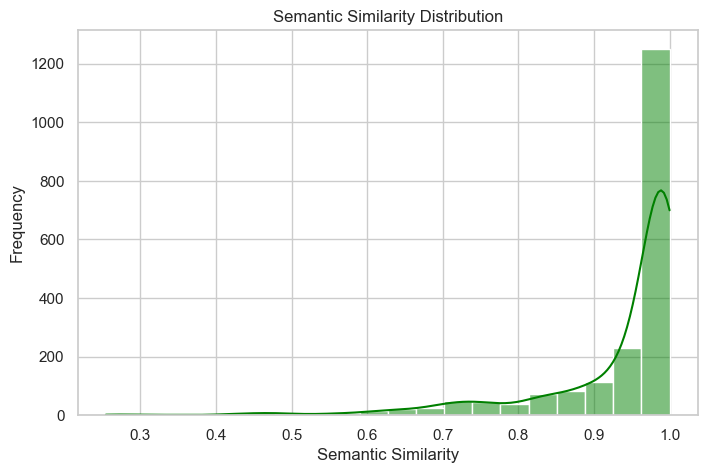

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(df['semantic_similarity'], kde=True, bins=20, color='green')
plt.title('Semantic Similarity Distribution')
plt.xlabel('Semantic Similarity')
plt.ylabel('Frequency')
plt.show()

In [52]:
# Define weights for each similarity type
weights = {
    'token_similarity': 0.3,   # Adjust if necessary
    'syntax_similarity': 0.3,
    'semantic_similarity': 0.4
}
#Token Similarity: Assigned a weight of 0.3, meaning it contributes 30% to the final score.
#Syntax Similarity: Assigned a weight of 0.3, contributing 30%.
#Semantic Similarity: Also assigned a weight of 0.4, contributing 40%.

# Function to calculate final similarity score
def calculate_final_similarity(row):
    final_score = (
        row['token_similarity'] * weights['token_similarity'] +
        row['syntax_similarity'] * weights['syntax_similarity'] +
        row['semantic_similarity'] * weights['semantic_similarity']
    )
    return final_score

# Apply the function to calculate final similarity scores
df['final_similarity'] = df.apply(calculate_final_similarity, axis=1)


In [54]:
# Define a threshold for final similarity
final_similarity_threshold = 0.85

# Filter for code pairs with final similarity above the threshold
most_similar_final_df = df[df['final_similarity'] >= final_similarity_threshold]


In [56]:
# Display the filtered results with final similarity score and error details
print(most_similar_final_df[['problem_id', 'original_src', 'changed_src', 'final_similarity', 'error', 'stderr']])


     problem_id                                       original_src  \
0        p00001  num = [int(input()) for i in range(10)]\nnum.s...   
1        p00003  import sys\n\ninput()\nfor e in sys.stdin:\n  ...   
4        p00007  import math\n\nr = 100\nn = input()\nfor i in ...   
6        p00031  while True:\n    g = int(input())\n    now = 5...   
11       p01981  while True:\n    a = list(map(str, input().spl...   
...         ...                                                ...   
1968     p03263  H, W = map(int, input().split())\nG = [list(ma...   
1969     p03263  h, w = map(int, input().split())\na = []\n\nfo...   
1970     p03263  import sys\n\nsys.setrecursionlimit(10**6)\nIN...   
1972     p03263  import sys\n\n\ndef input():\n    return sys.s...   
1973     p03263  from functools import partial\nfrom itertools ...   

                                            changed_src  final_similarity  \
0     num = [int(input()) for i in range(10)]\nnum.s...          0.878487   
1    

In [58]:
df.columns

Index(['problem_id', 'original_src', 'changed_src', 'error', 'stderr',
       'token_similarity', 'syntax_similarity', 'semantic_similarity',
       'final_similarity'],
      dtype='object')

In [60]:
df.head()


,problem_id,original_src,changed_src,error,stderr,token_similarity,syntax_similarity,semantic_similarity,final_similarity
0,p00001,num = [int(input()) for i in range(10)]\nnum.s...,num = [int(input()) for i in range(10)]\nnum.s...,TypeError: 'type' object is not subscriptable,"Traceback (most recent call last):\n File ""/h...",0.900000,0.704675,0.992710,0.878487
1,p00003,import sys\n\ninput()\nfor e in sys.stdin:\n ...,import sys\n\ninput()\nfor e in sys.stdin:\n ...,"TypeError: int() argument must be a string, a ...","Traceback (most recent call last):\n File ""/h...",0.909091,0.965939,0.990492,0.958706
2,p00003,while True:\n try:\n input_line = in...,"n = int(input())\nfor i in range(0, n):\n n...",IndexError: list index out of range,"Traceback (most recent call last):\n File ""/h...",0.642857,0.690865,0.856381,0.742669
3,p00006,print(input[::-1])\n,print(input()[::-1])\n,TypeError: 'builtin_function_or_method' object...,"Traceback (most recent call last):\n File ""/h...",0.000000,0.932238,0.986299,0.674191
4,p00007,import math\n\nr = 100\nn = input()\nfor i in ...,import math\n\nr = 100\nn = int(input())\nfor ...,TypeError: 'str' object cannot be interpreted ...,"Traceback (most recent call last):\n File ""/h...",0.937500,0.963603,0.993851,0.967871


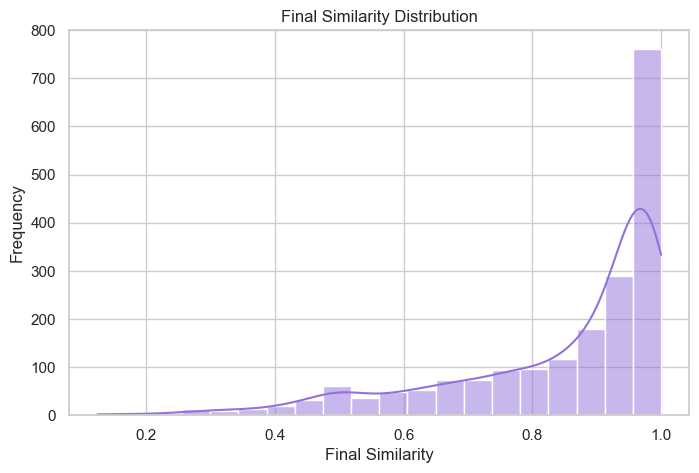

In [62]:
plt.figure(figsize=(8, 5))
sns.histplot(df['final_similarity'], kde=True, bins=20, color='mediumpurple')
plt.title('Final Similarity Distribution')
plt.xlabel('Final Similarity')
plt.ylabel('Frequency')
plt.show()

**load dataframe into csv file**

In [65]:
df.to_csv('your_similarity_scores.csv', index=False)

In [67]:
df=pd.read_csv("your_similarity_scores.csv")
df.head()


,problem_id,original_src,changed_src,error,stderr,token_similarity,syntax_similarity,semantic_similarity,final_similarity
0,p00001,num = [int(input()) for i in range(10)]\nnum.s...,num = [int(input()) for i in range(10)]\nnum.s...,TypeError: 'type' object is not subscriptable,"Traceback (most recent call last):\n File ""/h...",0.900000,0.704675,0.992710,0.878487
1,p00003,import sys\n\ninput()\nfor e in sys.stdin:\n ...,import sys\n\ninput()\nfor e in sys.stdin:\n ...,"TypeError: int() argument must be a string, a ...","Traceback (most recent call last):\n File ""/h...",0.909091,0.965939,0.990492,0.958706
2,p00003,while True:\n try:\n input_line = in...,"n = int(input())\nfor i in range(0, n):\n n...",IndexError: list index out of range,"Traceback (most recent call last):\n File ""/h...",0.642857,0.690865,0.856381,0.742669
3,p00006,print(input[::-1])\n,print(input()[::-1])\n,TypeError: 'builtin_function_or_method' object...,"Traceback (most recent call last):\n File ""/h...",0.000000,0.932238,0.986299,0.674191
4,p00007,import math\n\nr = 100\nn = input()\nfor i in ...,import math\n\nr = 100\nn = int(input())\nfor ...,TypeError: 'str' object cannot be interpreted ...,"Traceback (most recent call last):\n File ""/h...",0.937500,0.963603,0.993851,0.967871


In [72]:
%%writefile app.py
import streamlit as st
import pandas as pd

# Load your existing DataFrame with similarity scores
# Ensure that the CSV file exists in the same directory or provide the correct path
try:
    df = pd.read_csv('your_similarity_scores.csv')  # Replace with your actual CSV filename
    # st.write(df)  # Commented out to prevent displaying the entire DataFrame
except FileNotFoundError:
    st.error("CSV file not found. Please check the file path.")

# Function to retrieve similarity scores for a specific problem ID
def get_similarity_scores(problem_id):
    if problem_id in df['problem_id'].values:
        scores = df[df['problem_id'] == problem_id].iloc[0]
        return scores
    else:
        return None  # Return None if problem_id is not found

# Streamlit UI
st.title("Code Similarity Checker")

# Input for problem ID
problem_id_input = st.text_input("Enter Problem ID (e.g., p00001)")
# st.write(f"Problem ID Input: {problem_id_input}")  # You can comment this out if you don't want to display the input

if st.button("Check Similarity"):
    scores = get_similarity_scores(problem_id_input)
    
    if scores is not None:
        # Display results
        st.write(f"Token Similarity: {scores['token_similarity']:.2f}")
        st.write(f"Syntactic Similarity: {scores['syntax_similarity']:.2f}")
        st.write(f"Semantic Similarity: {scores['semantic_similarity']:.2f}")
        st.write(f"Final Similarity Score: {scores['final_similarity']:.2f}")
    else:
        st.write("Problem ID not found. Please enter a valid ID.")


Overwriting app.py
